**Math Word Problem Readability Score**


Experimented with all variables Raw attributes
 - (MathSymbolsPerSentence), (MathSymbolsPerSentence), etc...

Raw attributes - GF*, FK*, SMOG*, ARI*, CL*

In [1]:
import warnings 
warnings.filterwarnings("ignore") 

**IMPORT THE LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import scipy as scp
from sklearn.model_selection import train_test_split,GridSearchCV
import gensim
import nltk
import re



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical



from sklearn.metrics import confusion_matrix, classification_report

**READ THE DATA**

In [3]:
org_data = pd.read_csv("data.csv")

**CHECK THE FIRST FEW ROWS OF THE DATA**

In [4]:
org_data.head()

,Problem,Level,Type,Solution,Extracted words(List),Extracted Num(List)
0,There are constants alpha and beta suc...,Level 5,Algebra,The numerator x^2 - 80x + 1551 factors as (...,"['There', 'are', 'constants', 'alpha', 'and', ...","['2', '80', '1551', '2', '57', '2970']"
1,The length of the segment between the points ...,Level 5,Algebra,"By the distance formula, the distance from (2...","['The', 'length', 'of', 'the', 'segment', 'bet...","['2', '4', '4', '1', '2', '10']"
2,Chewbacca has 20 pieces of cherry gum and 30 p...,Level 5,Algebra,"If Chewbacca loses one pack of cherry gum, the...","['Chewbacca', 'has', 'pieces', 'of', 'cherry',...","['20', '30', '5']"
3,"For some constants a and b, let [f(x) = ...",Level 5,Algebra,"Setting x = 3, we get f(3) = -1. Since -1...","['For', 'some', 'constants', 'a', 'and', 'b', ...","['2', '8', '3', '2']"
4,Calculate the sum 1 + 3 + 5 + cdots + 15 + ...,Level 2,Algebra,"The arithmetic sequence 1, 3, 5, dots , 17,...","['Calculate', 'the', 'sum', 'cdots']","['1', '3', '5', '15', '17']"


**EXTRACT TWO COLUMNS OF THE DATA**

In [5]:
df = org_data.iloc[:,0:2]
df

,Problem,Level
0,There are constants alpha and beta suc...,Level 5
1,The length of the segment between the points ...,Level 5
2,Chewbacca has 20 pieces of cherry gum and 30 p...,Level 5
3,"For some constants a and b, let [f(x) = ...",Level 5
4,Calculate the sum 1 + 3 + 5 + cdots + 15 + ...,Level 2
...,...,...
1739,What is the slope of the line passing through ...,Level 2
1740,Evaluate i^{11} + i^{16} + i^{21} + i^{26} + ...,Level 4
1741,If a is a constant such that 4x^2 - 12x + a...,Level 3
1742,"Given a star b = a^2 + 2ab + b^2 , what is ...",Level 3


**CHECK FIRST FEW ROWS OF THE DATA**

In [6]:
df.head()

,Problem,Level
0,There are constants alpha and beta suc...,Level 5
1,The length of the segment between the points ...,Level 5
2,Chewbacca has 20 pieces of cherry gum and 30 p...,Level 5
3,"For some constants a and b, let [f(x) = ...",Level 5
4,Calculate the sum 1 + 3 + 5 + cdots + 15 + ...,Level 2


In [7]:
df['Problem ']=df['Problem '].apply(lambda x: str(x).lower())

**CHECK FOR THE NUMBER OF UNIQUE CLASSES IN EACH COLUMN**

In [8]:
df.nunique()

Problem     1744
Level          5
dtype: int64

**REMOVAL OF THE STRING PART (Level) FROM THE COLUMN "Level"**

In [9]:
df.iloc[:,1].replace(['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5'],
                        [1, 2, 3, 4, 5], inplace=True)

**READ THE DATA OF MATH VOCAB**




In [10]:
mathvocab = pd.read_csv("MathVocab.csv") 

In [11]:
mathvocab.head()

,Word
0,fractional
1,product
2,solve
3,equation
4,expression


**CREATED LIST OF ALL MATH VOCAB WORDS**

In [12]:
lst = mathvocab['Word'].tolist()

print("the list of a single column from the dataframe\n",
        lst,
        "\n",
        type(lst))

the list of a single column from the dataframe
 ['fractional', 'product', 'solve', 'equation', 'expression', 'rate', 'total', 'evaluate', 'compute', 'maximum', 'percent', 'arithmetic', 'sequence', 'integers', 'positive', 'distance', 'difference', 'how many', 'sum', 'square', 'cube', 'absolute value', 'cost', 'simplify', 'real number', 'what is the value', 'how much', 'operation', 'calculate', 'formula', 'positive integer', 'price', 'draw', 'length', 'subtract', 'lattice', 'largest', 'smallest', 'greatest number', 'equal', 'line', 'increase', 'multiple', 'average', 'number', 'divide', 'area', 'median', 'remainder', 'add', 'different', 'triange', 'equilateral', 'perimeter', 'size', 'angle', 'degree', 'measure', 'probability', 'segment', 'randomly chosen', 'prime number', 'random selection', 'randomly selected', 'digit', 'exact', 'paranethesis', 'obtuse', 'interior angle', 'ratio', 'range', 'multiply', 'function', 'domain', 'common fraction', 'hyperbola', 'graph', 'roots', 'even', 'odd', 

In [13]:
lst=[i.lower() for i in lst]

In [14]:
from nltk.stem import PorterStemmer
stemm=PorterStemmer()

In [15]:
stemmed_words=[stemm.stem(i) for i in lst]
stemmed_words

['fraction',
 'product',
 'solv',
 'equat',
 'express',
 'rate',
 'total',
 'evalu',
 'comput',
 'maximum',
 'percent',
 'arithmet',
 'sequenc',
 'integ',
 'posit',
 'distanc',
 'differ',
 'how mani',
 'sum',
 'squar',
 'cube',
 'absolute valu',
 'cost',
 'simplifi',
 'real numb',
 'what is the valu',
 'how much',
 'oper',
 'calcul',
 'formula',
 'positive integ',
 'price',
 'draw',
 'length',
 'subtract',
 'lattic',
 'largest',
 'smallest',
 'greatest numb',
 'equal',
 'line',
 'increas',
 'multipl',
 'averag',
 'number',
 'divid',
 'area',
 'median',
 'remaind',
 'add',
 'differ',
 'triang',
 'equilater',
 'perimet',
 'size',
 'angl',
 'degre',
 'measur',
 'probabl',
 'segment',
 'randomly chosen',
 'prime numb',
 'random select',
 'randomly select',
 'digit',
 'exact',
 'paranethesi',
 'obtus',
 'interior angl',
 'ratio',
 'rang',
 'multipli',
 'function',
 'domain',
 'common fract',
 'hyperbola',
 'graph',
 'root',
 'even',
 'odd',
 'complex',
 'plane',
 'mid-point',
 'conjug',
 'r

**EXTRACTING MATH VOCAB WORDS FROM THE COLUMN 'Problem'**

In [16]:
query = '|'.join(lst)
query

'fractional|product|solve|equation|expression|rate|total|evaluate|compute|maximum|percent|arithmetic|sequence|integers|positive|distance|difference|how many|sum|square|cube|absolute value|cost|simplify|real number|what is the value|how much|operation|calculate|formula|positive integer|price|draw|length|subtract|lattice|largest|smallest|greatest number|equal|line|increase|multiple|average|number|divide|area|median|remainder|add|different|triange|equilateral|perimeter|size|angle|degree|measure|probability|segment|randomly chosen|prime number|random selection|randomly selected|digit|exact|paranethesis|obtuse|interior angle|ratio|range|multiply|function|domain|common fraction|hyperbola|graph|roots|even|odd|complex|plane|mid-point|conjugate|radicale|polynomial|interval|lowest|midpoint|consecutive|preceding|times|slope|endpoint|coordinate|proportional|reciprocal|numerator|denominator|set|inverse|simplest|intersection|point|intercept|cooefficient|ordered|inclusive|exclusive|vertices|altogethe

In [17]:
df['word'] = df['Problem '].str.findall(r'\b({})\b'.format(query)) 

print(df)

                                               Problem   Level   \
0     there are constants    alpha  and    beta  suc...       5   
1     the length of the segment between the points  ...       5   
2     chewbacca has 20 pieces of cherry gum and 30 p...       5   
3     for some constants  a  and  b,  let   [f(x) = ...       5   
4     calculate the sum  1 + 3 + 5 +   cdots + 15 + ...       2   
...                                                 ...     ...   
1739  what is the slope of the line passing through ...       2   
1740  evaluate  i^{11} + i^{16} + i^{21} + i^{26} + ...       4   
1741  if  a  is a constant such that  4x^2 - 12x + a...       3   
1742  given  a   star b = a^2 + 2ab + b^2 , what is ...       3   
1743  the graph of the function  f(x)  is shown belo...       5   

                                                   word  
0                               [constants, frac, frac]  
1                      [length, segment, sqrt, product]  
2                    

In [18]:
df['Mword_count']=df['word'].apply(lambda x: len(x))

In [19]:
df.head()

,Problem,Level,word,Mword_count
0,there are constants alpha and beta suc...,5,"[constants, frac, frac]",3
1,the length of the segment between the points ...,5,"[length, segment, sqrt, product]",4
2,chewbacca has 20 pieces of cherry gum and 30 p...,5,"[ratio, number, number, find]",4
3,"for some constants a and b, let [f(x) = ...",5,"[constants, function]",2
4,calculate the sum 1 + 3 + 5 + cdots + 15 + ...,2,"[calculate, sum]",2


In [20]:
def get_equations_count(expression):
  regexes = [r"\$\$([^$]+)\$\$", r"\$([^$]+)\$", r"\\\(([^$]+)\\\)", r"\\\[([^$]+)\\\]"]
  no_of_equations = 0
  for regex in regexes:
    matches = re.findall(regex, expression)
    no_of_equations += len(matches)
    expression = re.sub(regex, "", expression)
  return pd.Series({'modified_problem':expression})


In [21]:
df = pd.concat([df, df['Problem '].apply(get_equations_count)], axis=1)

In [22]:
df.head()

,Problem,Level,word,Mword_count,modified_problem
0,there are constants alpha and beta suc...,5,"[constants, frac, frac]",3,there are constants alpha and beta suc...
1,the length of the segment between the points ...,5,"[length, segment, sqrt, product]",4,the length of the segment between the points ...
2,chewbacca has 20 pieces of cherry gum and 30 p...,5,"[ratio, number, number, find]",4,chewbacca has 20 pieces of cherry gum and 30 p...
3,"for some constants a and b, let [f(x) = ...",5,"[constants, function]",2,"for some constants a and b, let [f(x) = ..."
4,calculate the sum 1 + 3 + 5 + cdots + 15 + ...,2,"[calculate, sum]",2,calculate the sum 1 + 3 + 5 + cdots + 15 + ...


In [23]:
df.loc[0,'modified_problem']

'there are constants    alpha  and    beta  such that    frac{x-  alpha}{x+  beta} =   frac{x^2-80x+1551}{x^2+57x-2970} . what is    alpha+  beta ?'

**mathword_count = TMVW** (total math vocab words )

In [24]:
# def word_length(df_col):
#   number_of_words = len(df_col.split())
#   # print(df_col.split())
#   return number_of_words

In [25]:
#df_liststring['mathword_count'] = df_liststring['liststring'].apply(word_length)

**FUNCTION TO COUNT THE TOTAL NUMBER OF SENTENCES IN EACH MATH WORD PROBLEM**

In [26]:
from nltk import sent_tokenize

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pawan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
def count_sentences(data):
  number_of_sentences = sent_tokenize(data)
  return len(number_of_sentences)

In [29]:
df['countsent'] = df['modified_problem'].apply(count_sentences)

In [30]:
df.head()

,Problem,Level,word,Mword_count,modified_problem,countsent
0,there are constants alpha and beta suc...,5,"[constants, frac, frac]",3,there are constants alpha and beta suc...,2
1,the length of the segment between the points ...,5,"[length, segment, sqrt, product]",4,the length of the segment between the points ...,2
2,chewbacca has 20 pieces of cherry gum and 30 p...,5,"[ratio, number, number, find]",4,chewbacca has 20 pieces of cherry gum and 30 p...,5
3,"for some constants a and b, let [f(x) = ...",5,"[constants, function]",2,"for some constants a and b, let [f(x) = ...",2
4,calculate the sum 1 + 3 + 5 + cdots + 15 + ...,2,"[calculate, sum]",2,calculate the sum 1 + 3 + 5 + cdots + 15 + ...,1


**FUNCTION TO COUNT ALL NUMBER OF WORDS IN EACH MATH PROBLEM**

In [31]:
def count_allwords(data):
  number_of_words = len(data.split())
  return number_of_words 

In [32]:
df['allwords'] = df['Problem '].apply(count_allwords)

In [33]:
df.head()

,Problem,Level,word,Mword_count,modified_problem,countsent,allwords
0,there are constants alpha and beta suc...,5,"[constants, frac, frac]",3,there are constants alpha and beta suc...,2,19
1,the length of the segment between the points ...,5,"[length, segment, sqrt, product]",4,the length of the segment between the points ...,2,28
2,chewbacca has 20 pieces of cherry gum and 30 p...,5,"[ratio, number, number, find]",4,chewbacca has 20 pieces of cherry gum and 30 p...,5,81
3,"for some constants a and b, let [f(x) = ...",5,"[constants, function]",2,"for some constants a and b, let [f(x) = ...",2,50
4,calculate the sum 1 + 3 + 5 + cdots + 15 + ...,2,"[calculate, sum]",2,calculate the sum 1 + 3 + 5 + cdots + 15 + ...,1,15


**FUNCTION TO COUNT THE MATH SYMBOLS IN EACH WORD PROBLEM**

In [34]:
math_symbols = []
l = "!@#$%^&*()-[]{}:;<>+=-/?.,"
for i in l:
  math_symbols.append(i)

In [35]:

def count_symbols(data):
  total_count = 0
  data = data.split()
  for word in data: 
    if word in math_symbols:
      total_count = total_count+1
  return total_count

In [36]:
df['symbols'] = df['Problem '].apply(count_symbols)

In [37]:
df.head()

,Problem,Level,word,Mword_count,modified_problem,countsent,allwords,symbols
0,there are constants alpha and beta suc...,5,"[constants, frac, frac]",3,there are constants alpha and beta suc...,2,19,3
1,the length of the segment between the points ...,5,"[length, segment, sqrt, product]",4,the length of the segment between the points ...,2,28,1
2,chewbacca has 20 pieces of cherry gum and 30 p...,5,"[ratio, number, number, find]",4,chewbacca has 20 pieces of cherry gum and 30 p...,5,81,1
3,"for some constants a and b, let [f(x) = ...",5,"[constants, function]",2,"for some constants a and b, let [f(x) = ...",2,50,11
4,calculate the sum 1 + 3 + 5 + cdots + 15 + ...,2,"[calculate, sum]",2,calculate the sum 1 + 3 + 5 + cdots + 15 + ...,1,15,6


**FUNCTION TO COUNT THE NUMBERS IN EACH MATH WORD PROBLEM**

In [38]:
def count_nums(data):
  total_count = 0
  data = data.split()
  for word in data: 
    if word.isalpha() == False:
      total_count = total_count+1
  return total_count

In [39]:
df['numbers'] = df['Problem '].apply(count_nums)

In [40]:
df.head()

,Problem,Level,word,Mword_count,modified_problem,countsent,allwords,symbols,numbers
0,there are constants alpha and beta suc...,5,"[constants, frac, frac]",3,there are constants alpha and beta suc...,2,19,3,8
1,the length of the segment between the points ...,5,"[length, segment, sqrt, product]",4,the length of the segment between the points ...,2,28,1,8
2,chewbacca has 20 pieces of cherry gum and 30 p...,5,"[ratio, number, number, find]",4,chewbacca has 20 pieces of cherry gum and 30 p...,5,81,1,10
3,"for some constants a and b, let [f(x) = ...",5,"[constants, function]",2,"for some constants a and b, let [f(x) = ...",2,50,11,26
4,calculate the sum 1 + 3 + 5 + cdots + 15 + ...,2,"[calculate, sum]",2,calculate the sum 1 + 3 + 5 + cdots + 15 + ...,1,15,6,11


**COUNT OF MATH VOCAB WORD IN EACH SENTENCE ('mathword_count'/'countsent')**
* TOTAL MATH VOCAB IN PROBLEM/NUMBER OF SENTENCES IN PROBLEM

In [41]:
df['mathprop'] = df['Mword_count']/df['countsent']
df.head()

,Problem,Level,word,Mword_count,modified_problem,countsent,allwords,symbols,numbers,mathprop
0,there are constants alpha and beta suc...,5,"[constants, frac, frac]",3,there are constants alpha and beta suc...,2,19,3,8,1.5
1,the length of the segment between the points ...,5,"[length, segment, sqrt, product]",4,the length of the segment between the points ...,2,28,1,8,2.0
2,chewbacca has 20 pieces of cherry gum and 30 p...,5,"[ratio, number, number, find]",4,chewbacca has 20 pieces of cherry gum and 30 p...,5,81,1,10,0.8
3,"for some constants a and b, let [f(x) = ...",5,"[constants, function]",2,"for some constants a and b, let [f(x) = ...",2,50,11,26,1.0
4,calculate the sum 1 + 3 + 5 + cdots + 15 + ...,2,"[calculate, sum]",2,calculate the sum 1 + 3 + 5 + cdots + 15 + ...,1,15,6,11,2.0


FUNCTION FOR CALCULATING NUMBER OF (CHARACTERS) IN WORD PROBLEM

In [42]:
def count_chars(df_col):
  count = 0
  for i in df_col:
    for j in i:
      count = count+1
  return count 

In [43]:
df['char_sum'] = df['modified_problem'].apply(count_chars)

In [44]:
df.loc[0,"modified_problem"]

'there are constants    alpha  and    beta  such that    frac{x-  alpha}{x+  beta} =   frac{x^2-80x+1551}{x^2+57x-2970} . what is    alpha+  beta ?'

**word_sum = CMVW**

In [45]:
df.head()

,Problem,Level,word,Mword_count,modified_problem,countsent,allwords,symbols,numbers,mathprop,char_sum
0,there are constants alpha and beta suc...,5,"[constants, frac, frac]",3,there are constants alpha and beta suc...,2,19,3,8,1.5,146
1,the length of the segment between the points ...,5,"[length, segment, sqrt, product]",4,the length of the segment between the points ...,2,28,1,8,2.0,146
2,chewbacca has 20 pieces of cherry gum and 30 p...,5,"[ratio, number, number, find]",4,chewbacca has 20 pieces of cherry gum and 30 p...,5,81,1,10,0.8,404
3,"for some constants a and b, let [f(x) = ...",5,"[constants, function]",2,"for some constants a and b, let [f(x) = ...",2,50,11,26,1.0,245
4,calculate the sum 1 + 3 + 5 + cdots + 15 + ...,2,"[calculate, sum]",2,calculate the sum 1 + 3 + 5 + cdots + 15 + ...,1,15,6,11,2.0,50


In [46]:
def complex_words(mwl_col):
    words = mwl_col.split()
    count = 0
    for word in words:
        if len(word) > 6:
            count += 1
    return count

In [47]:
WordsPerSentence = []
#MathWordsPerSentence = []
MathSymbolsPerSentence = [] 
NumCountPerSentence = [] 

**CALCULATION OF:**
1. WordsPerSentence
2. MathSymbolsPerSentence
3. NumCountPerSentence 

In [48]:
for i in df.iloc[:,0]:
  s = count_sentences(i)
  w = count_allwords(i)
  ms = count_symbols(i)
  n = count_nums(i) 
  #mw = word_length(i)

  WordsPerSentence.append(w/s)  
  MathSymbolsPerSentence.append(ms/s)   
  NumCountPerSentence.append(n/s)  
  #MathWordsPerSentence.append(mw/s) 

In [49]:
df_data = pd.DataFrame() 
df_data["WordsPerSentence"] = WordsPerSentence
df_data["MathSymbolsPerSentence"] = MathSymbolsPerSentence
df_data["NumCountPerSentence"] = NumCountPerSentence

In [50]:
df_data=pd.concat([df,df_data],axis=1)
df_data.head(5)

,Problem,Level,word,Mword_count,modified_problem,countsent,allwords,symbols,numbers,mathprop,char_sum,WordsPerSentence,MathSymbolsPerSentence,NumCountPerSentence
0,there are constants alpha and beta suc...,5,"[constants, frac, frac]",3,there are constants alpha and beta suc...,2,19,3,8,1.5,146,9.5,1.5,4.0
1,the length of the segment between the points ...,5,"[length, segment, sqrt, product]",4,the length of the segment between the points ...,2,28,1,8,2.0,146,14.0,0.5,4.0
2,chewbacca has 20 pieces of cherry gum and 30 p...,5,"[ratio, number, number, find]",4,chewbacca has 20 pieces of cherry gum and 30 p...,5,81,1,10,0.8,404,16.2,0.2,2.0
3,"for some constants a and b, let [f(x) = ...",5,"[constants, function]",2,"for some constants a and b, let [f(x) = ...",2,50,11,26,1.0,245,25.0,5.5,13.0
4,calculate the sum 1 + 3 + 5 + cdots + 15 + ...,2,"[calculate, sum]",2,calculate the sum 1 + 3 + 5 + cdots + 15 + ...,1,15,6,11,2.0,50,15.0,6.0,11.0


**FUNCTION TO COUNT SYLLABLES IN EACH WORD PROBLEM**

**Counted number of syllables.**

In [51]:
def syllable_count(df_col):
    df_col = df_col.lower()
    count = 0
    vowels = "aeiou"
    if df_col[0] in vowels:
        count += 1
    for index in range(1, len(df_col)):
        if df_col[index] in vowels and df_col[index - 1] not in vowels:
            count += 1
    if df_col.endswith("e"):
        count -= 1
    if count == 0:
        count += 1
    return count

In [52]:
df_data['syllables'] = df_data['Problem '].apply(syllable_count)

In [53]:
df_data.head()

,Problem,Level,word,Mword_count,modified_problem,countsent,allwords,symbols,numbers,mathprop,char_sum,WordsPerSentence,MathSymbolsPerSentence,NumCountPerSentence,syllables
0,there are constants alpha and beta suc...,5,"[constants, frac, frac]",3,there are constants alpha and beta suc...,2,19,3,8,1.5,146,9.5,1.5,4.0,25
1,the length of the segment between the points ...,5,"[length, segment, sqrt, product]",4,the length of the segment between the points ...,2,28,1,8,2.0,146,14.0,0.5,4.0,30
2,chewbacca has 20 pieces of cherry gum and 30 p...,5,"[ratio, number, number, find]",4,chewbacca has 20 pieces of cherry gum and 30 p...,5,81,1,10,0.8,404,16.2,0.2,2.0,107
3,"for some constants a and b, let [f(x) = ...",5,"[constants, function]",2,"for some constants a and b, let [f(x) = ...",2,50,11,26,1.0,245,25.0,5.5,13.0,36
4,calculate the sum 1 + 3 + 5 + cdots + 15 + ...,2,"[calculate, sum]",2,calculate the sum 1 + 3 + 5 + cdots + 15 + ...,1,15,6,11,2.0,50,15.0,6.0,11.0,7


**FUNCTION TO COUNT OF POLY SYLLABLES IN EACH WORD PROBLEM**

In [54]:
def count_poly_syllables(df_col):
  total_count = 0
  df_col = df_col.split()
  for word in df_col: 
    #print(word)
    temp = syllable_count(word)
    if temp>=3:
      total_count = total_count+temp
  return total_count

In [55]:
df_data['poly_syllables'] = df_data['Problem '].apply(count_poly_syllables)

In [56]:
df_data.head()

,Problem,Level,word,Mword_count,modified_problem,countsent,allwords,symbols,numbers,mathprop,char_sum,WordsPerSentence,MathSymbolsPerSentence,NumCountPerSentence,syllables,poly_syllables
0,there are constants alpha and beta suc...,5,"[constants, frac, frac]",3,there are constants alpha and beta suc...,2,19,3,8,1.5,146,9.5,1.5,4.0,25,0
1,the length of the segment between the points ...,5,"[length, segment, sqrt, product]",4,the length of the segment between the points ...,2,28,1,8,2.0,146,14.0,0.5,4.0,30,0
2,chewbacca has 20 pieces of cherry gum and 30 p...,5,"[ratio, number, number, find]",4,chewbacca has 20 pieces of cherry gum and 30 p...,5,81,1,10,0.8,404,16.2,0.2,2.0,107,6
3,"for some constants a and b, let [f(x) = ...",5,"[constants, function]",2,"for some constants a and b, let [f(x) = ...",2,50,11,26,1.0,245,25.0,5.5,13.0,36,7
4,calculate the sum 1 + 3 + 5 + cdots + 15 + ...,2,"[calculate, sum]",2,calculate the sum 1 + 3 + 5 + cdots + 15 + ...,1,15,6,11,2.0,50,15.0,6.0,11.0,7,3


1. count_sentences = number of sentences in word Problem
2. count_allwords = all words in word Problem
3. count_symbols = math symbols in word Problem
4. count_nums = count numbers in word Problem
5. syllable_count = number of syllables in word problem
6. count_poly_syllables = number of poly syllables in word problem
7. count_char = total characters in word Problem


### Experiment 1: Use only math scores to predict the levels

In [57]:
df_data.columns

Index(['Problem ', 'Level ', 'word', 'Mword_count', 'modified_problem',
       'countsent', 'allwords', 'symbols', 'numbers', 'mathprop', 'char_sum',
       'WordsPerSentence', 'MathSymbolsPerSentence', 'NumCountPerSentence',
       'syllables', 'poly_syllables'],
      dtype='object')

In [58]:
###### Required data
cols=['Level ','Mword_count','mathprop','MathSymbolsPerSentence','NumCountPerSentence']
math_data=df_data[cols]
math_data.head()

,Level,Mword_count,mathprop,MathSymbolsPerSentence,NumCountPerSentence
0,5,3,1.5,1.5,4.0
1,5,4,2.0,0.5,4.0
2,5,4,0.8,0.2,2.0
3,5,2,1.0,5.5,13.0
4,2,2,2.0,6.0,11.0


In [59]:
#### 
X_train,X_test,y_train,y_test=train_test_split(math_data.iloc[:,1:],math_data.iloc[:,0],test_size=0.2,random_state=42)

In [60]:
y1_train=y_train.replace({2:1,3:2,4:3,5:3})
print(y_train.value_counts())
print("\n")
print(y1_train.value_counts())

5    349
4    320
3    314
2    275
1    137
Name: Level , dtype: int64


3    669
1    412
2    314
Name: Level , dtype: int64


In [61]:
y1_test=y_test.replace({2:1,3:2,4:3,5:3})

In [62]:
### Test on 5 levels
mod_dt=DecisionTreeClassifier(class_weight='balanced',max_depth=5)
mod_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [63]:
## Predictions
tr_pred=mod_dt.predict(X_train)
te_pred=mod_dt.predict(X_test)

print(classification_report(y_train,tr_pred))
print("\n")
print(classification_report(y_test,te_pred))


              precision    recall  f1-score   support

           1       0.21      0.71      0.32       137
           2       0.36      0.23      0.28       275
           3       0.48      0.11      0.18       314
           4       0.40      0.18      0.25       320
           5       0.40      0.61      0.48       349

    accuracy                           0.33      1395
   macro avg       0.37      0.37      0.30      1395
weighted avg       0.39      0.33      0.31      1395



              precision    recall  f1-score   support

           1       0.24      0.68      0.36        41
           2       0.30      0.25      0.27        65
           3       0.29      0.09      0.14        78
           4       0.38      0.12      0.18        78
           5       0.33      0.49      0.39        87

    accuracy                           0.30       349
   macro avg       0.31      0.33      0.27       349
weighted avg       0.31      0.30      0.26       349



In [64]:
### on 3 classes
mod_dt=DecisionTreeClassifier(class_weight='balanced',max_depth=5)
mod_dt.fit(X_train,y1_train)

tr_pred=mod_dt.predict(X_train)
te_pred=mod_dt.predict(X_test)

print(classification_report(y1_train,tr_pred))
print("\n")
print(classification_report(y1_test,te_pred))


              precision    recall  f1-score   support

           1       0.48      0.58      0.52       412
           2       0.36      0.37      0.37       314
           3       0.66      0.56      0.61       669

    accuracy                           0.52      1395
   macro avg       0.50      0.50      0.50      1395
weighted avg       0.54      0.52      0.53      1395



              precision    recall  f1-score   support

           1       0.46      0.53      0.49       106
           2       0.26      0.31      0.28        78
           3       0.62      0.50      0.56       165

    accuracy                           0.47       349
   macro avg       0.45      0.45      0.44       349
weighted avg       0.49      0.47      0.47       349



In [65]:
### Ordered Regression on 5 classes

ord_data=pd.concat([X_train,y_train],axis=1)
ord_data.head()

,Mword_count,mathprop,MathSymbolsPerSentence,NumCountPerSentence,Level
864,3,1.5,0.5,2.5,5
310,3,3.0,4.0,7.0,5
56,1,1.0,3.0,13.0,4
1736,4,2.0,0.5,2.0,5
1138,3,3.0,1.0,2.0,5


In [66]:
ord_data.columns

Index(['Mword_count', 'mathprop', 'MathSymbolsPerSentence',
       'NumCountPerSentence', 'Level '],
      dtype='object')

In [67]:
# Fit the ordinal regression model
from statsmodels.miscmodels.ordinal_model import OrderedModel
mod_ordered=OrderedModel(ord_data['Level '],ord_data[['Mword_count', 'mathprop', 'MathSymbolsPerSentence',
       'NumCountPerSentence']],distr='logit',)

res_log = mod_ordered.fit(method='bfgs')
res_log.summary()


Optimization terminated successfully.
         Current function value: 1.517891
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                 Level    Log-Likelihood:                -2117.5
Model:                   OrderedModel   AIC:                             4251.
Method:            Maximum Likelihood   BIC:                             4293.
Date:                Tue, 13 Jun 2023                                         
Time:                        22:33:02                                         
No. Observations:                1395                                         
Df Residuals:                    1387                                         
Df Model:                           8                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Mword_count                0.2628      0.031      8.542      0.000       0.203       0.323
mathprop                  -0.0820      0.042     -1.933      0.053      -0.165       0.001
MathSymbolsPerSentence     0.1109      0.040      2.765      0.006       0.032       0.190
NumCountPerSentence       -0.0139      0.018     -0.794      0.427      -0.048       0.020
1/2                       -1.4891      0.118    -12.570      0.000      -1.721      -1.257
2/3                        0.3362      0.058      5.842      0.000       0.223       0.449
3/4                        0.0142      0.052      0.276      0.782      -0.087       0.115
4/5                        0.0940      0.051      1.828      0.068      -0.007       0.195
==========================================================================================
"""

In [68]:
ord_test=pd.concat([X_test,y_test],axis=1)
pred_train=res_log.model.predict(res_log.params, exog=ord_data[['Mword_count', 'mathprop', 'MathSymbolsPerSentence',
       'NumCountPerSentence']])
pred_test=res_log.model.predict(res_log.params, exog=ord_test[['Mword_count', 'mathprop', 'MathSymbolsPerSentence',
       'NumCountPerSentence']])

In [69]:
pred_train

array([[0.10199861, 0.21327975, 0.24413536, 0.23263098, 0.20795529],
       [0.08488081, 0.18837814, 0.23578734, 0.24765908, 0.24329463],
       [0.13922636, 0.25679409, 0.24786422, 0.2004416 , 0.15567373],
       ...,
       [0.1263276 , 0.243217  , 0.24824306, 0.21122986, 0.17098248],
       [0.02602852, 0.07171664, 0.13227563, 0.24258613, 0.52739308],
       [0.07273054, 0.1685216 , 0.22592328, 0.25735055, 0.27547403]])

In [70]:
pred_train1=np.argmax(pred_train, axis=1)+1
pred_test1=np.argmax(pred_test, axis=1)+1

In [71]:
print(classification_report(ord_data['Level '],pred_train1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       137
           2       0.28      0.29      0.29       275
           3       0.25      0.42      0.32       314
           4       0.20      0.08      0.12       320
           5       0.39      0.50      0.44       349

    accuracy                           0.30      1395
   macro avg       0.22      0.26      0.23      1395
weighted avg       0.25      0.30      0.26      1395



In [72]:
print(classification_report(ord_test['Level '],pred_test1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        41
           2       0.24      0.22      0.23        65
           3       0.23      0.44      0.30        78
           4       0.26      0.08      0.12        78
           5       0.38      0.53      0.44        87

    accuracy                           0.29       349
   macro avg       0.22      0.25      0.22       349
weighted avg       0.25      0.29      0.25       349



In [73]:
### for 3 levels
ord_data1=pd.concat([X_train,y1_train],axis=1)
ord_test1=pd.concat([X_test,y1_test],axis=1)

In [74]:
mod_ordered=OrderedModel(ord_data1['Level '],ord_data1[['Mword_count', 'mathprop', 'MathSymbolsPerSentence',
       'NumCountPerSentence']],distr='logit')

res_log = mod_ordered.fit(method='bfgs')
res_log.summary()


Optimization terminated successfully.
         Current function value: 1.004994
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                 Level    Log-Likelihood:                -1402.0
Model:                   OrderedModel   AIC:                             2816.
Method:            Maximum Likelihood   BIC:                             2847.
Date:                Tue, 13 Jun 2023                                         
Time:                        22:33:02                                         
No. Observations:                1395                                         
Df Residuals:                    1389                                         
Df Model:                           6                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Mword_count                0.2824      0.037      7.654      0.000       0.210       0.355
mathprop                  -0.0773      0.049     -1.563      0.118      -0.174       0.020
MathSymbolsPerSentence     0.1345      0.043      3.102      0.002       0.050       0.220
NumCountPerSentence       -0.0262      0.019     -1.356      0.175      -0.064       0.012
1/2                       -0.0572      0.110     -0.519      0.604      -0.273       0.159
2/3                        0.0214      0.052      0.415      0.678      -0.080       0.122
==========================================================================================
"""

In [75]:
pred_train=np.argmax(res_log.model.predict(res_log.params, exog=ord_data[['Mword_count', 'mathprop', 'MathSymbolsPerSentence',
       'NumCountPerSentence']]),axis=1)+1
pred_test=np.argmax(res_log.model.predict(res_log.params, exog=ord_test[['Mword_count', 'mathprop', 'MathSymbolsPerSentence',
       'NumCountPerSentence']]),axis=1)+1

In [76]:
print(classification_report(ord_data1['Level '],pred_train))

              precision    recall  f1-score   support

           1       0.50      0.40      0.44       412
           2       0.00      0.00      0.00       314
           3       0.54      0.86      0.66       669

    accuracy                           0.53      1395
   macro avg       0.35      0.42      0.37      1395
weighted avg       0.41      0.53      0.45      1395



In [77]:
print(classification_report(ord_test1['Level '],pred_test))

              precision    recall  f1-score   support

           1       0.44      0.32      0.37       106
           2       0.00      0.00      0.00        78
           3       0.52      0.86      0.65       165

    accuracy                           0.50       349
   macro avg       0.32      0.39      0.34       349
weighted avg       0.38      0.50      0.42       349



In [78]:
### ANN on 5 levels
y5_train=to_categorical(y_train)
y5_test=to_categorical(y_test)

y5_train=y5_train[:,1:]
y5_test=y5_test[:,1:]

model=Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(32, input_dim=4, activation='relu'))

# Add the output layer
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

model.fit(X_train, y5_train, epochs=32, batch_size=16)

Epoch 1/32
88/88 [==============================] - 1s 2ms/step - loss: 1.9881 - accuracy: 0.2416
Epoch 2/32
88/88 [==============================] - 0s 2ms/step - loss: 1.6103 - accuracy: 0.2559
Epoch 3/32
88/88 [==============================] - 0s 2ms/step - loss: 1.5841 - accuracy: 0.2738
Epoch 4/32
88/88 [==============================] - 0s 2ms/step - loss: 1.5685 - accuracy: 0.2760
Epoch 5/32
88/88 [==============================] - 0s 2ms/step - loss: 1.5581 - accuracy: 0.2810
Epoch 6/32
88/88 [==============================] - 0s 2ms/step - loss: 1.5558 - accuracy: 0.2774
Epoch 7/32
88/88 [==============================] - 0s 2ms/step - loss: 1.5456 - accuracy: 0.2753
Epoch 8/32
88/88 [==============================] - 0s 2ms/step - loss: 1.5375 - accuracy: 0.2789
Epoch 9/32
88/88 [==============================] - 0s 2ms/step - loss: 1.5361 - accuracy: 0.2760
Epoch 10/32
88/88 [==============================] - 0s 2ms/step - loss: 1.5338 - accuracy: 0.2896
Epoch 11/32
88/88 [

In [79]:
pred_train=np.argmax(model.predict(X_train),axis=1)+1
pred_train

44/44 [==============================] - 0s 1ms/step


array([5, 5, 5, ..., 4, 5, 5], dtype=int64)

In [80]:
pred_test=np.argmax(model.predict(X_test),axis=1)+1
print(classification_report(y_test,pred_test))

11/11 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        41
           2       0.24      0.32      0.27        65
           3       0.00      0.00      0.00        78
           4       0.19      0.18      0.18        78
           5       0.33      0.69      0.45        87

    accuracy                           0.27       349
   macro avg       0.15      0.24      0.18       349
weighted avg       0.17      0.27      0.20       349



In [81]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           1       0.50      0.12      0.19       137
           2       0.26      0.34      0.30       275
           3       0.00      0.00      0.00       314
           4       0.26      0.24      0.25       320
           5       0.35      0.71      0.47       349

    accuracy                           0.31      1395
   macro avg       0.27      0.28      0.24      1395
weighted avg       0.25      0.31      0.25      1395



In [82]:
### ANN
####### on 3 levels
y11_train=to_categorical(y1_train)
y11_test=to_categorical(y1_test)

y11_train=y11_train[:,1:]
y11_test=y11_test[:,1:]

model=Sequential()
# Add the input layer and the first hidden layer
model.add(Dense(32, input_dim=4, activation='relu'))

# Add the output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

model.fit(X_train, y11_train, epochs=32, batch_size=16)

Epoch 1/32
88/88 [==============================] - 1s 2ms/step - loss: 1.2104 - accuracy: 0.3900
Epoch 2/32
88/88 [==============================] - 0s 2ms/step - loss: 1.0330 - accuracy: 0.4717
Epoch 3/32
88/88 [==============================] - 0s 2ms/step - loss: 1.0160 - accuracy: 0.4839
Epoch 4/32
88/88 [==============================] - 0s 2ms/step - loss: 1.0133 - accuracy: 0.4925
Epoch 5/32
88/88 [==============================] - 0s 2ms/step - loss: 1.0080 - accuracy: 0.4968
Epoch 6/32
88/88 [==============================] - 0s 2ms/step - loss: 1.0047 - accuracy: 0.5111
Epoch 7/32
88/88 [==============================] - 0s 2ms/step - loss: 1.0039 - accuracy: 0.5197
Epoch 8/32
88/88 [==============================] - 0s 2ms/step - loss: 1.0013 - accuracy: 0.5183
Epoch 9/32
88/88 [==============================] - 0s 2ms/step - loss: 1.0039 - accuracy: 0.5104
Epoch 10/32
88/88 [==============================] - 0s 2ms/step - loss: 0.9998 - accuracy: 0.5211
Epoch 11/32
88/88 [

In [83]:
pred_train=np.argmax(model.predict(X_train),axis=1)+1


44/44 [==============================] - 0s 1ms/step


In [84]:
pred_test=np.argmax(model.predict(X_test),axis=1)+1
print(classification_report(y1_test,pred_test))

11/11 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           1       0.48      0.41      0.44       106
           2       0.00      0.00      0.00        78
           3       0.54      0.85      0.66       165

    accuracy                           0.52       349
   macro avg       0.34      0.42      0.37       349
weighted avg       0.40      0.52      0.45       349



In [85]:
print(classification_report(y1_train,pred_train))

              precision    recall  f1-score   support

           1       0.48      0.41      0.44       412
           2       0.60      0.01      0.02       314
           3       0.54      0.83      0.66       669

    accuracy                           0.52      1395
   macro avg       0.54      0.42      0.37      1395
weighted avg       0.53      0.52      0.45      1395



In [86]:
from sklearn.cluster import KMeans

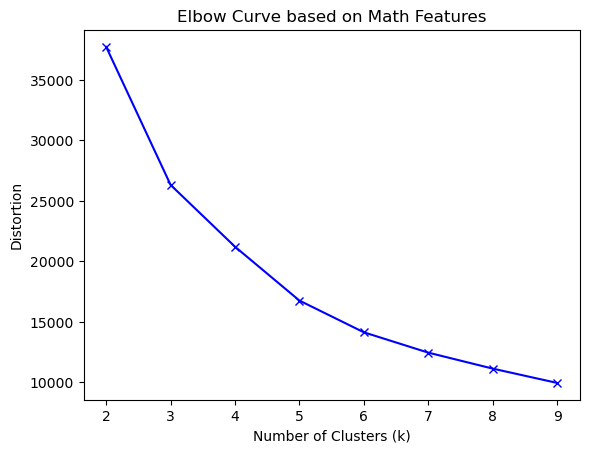

In [87]:
import matplotlib.pyplot as plt
# Define the range of k values to evaluate
k_values = range(2, 10)

distortions = []
results = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=50)
    kmeans.fit(X_train)
    results.append(kmeans.labels_)
    distortion = kmeans.inertia_
    distortions.append(distortion)

plt.plot(k_values, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Curve based on Math Features')
plt.show()


In [88]:
### Adjusted RandIndex
from sklearn.metrics import adjusted_rand_score
import numpy as np

# Set the number of clusters for k-means
n_clusters = 3

cluster_labels = []
all_labels = []
num_runs = 10
for _ in range(num_runs):
    perturbed_data = X_train + np.random.normal(scale=0.01, size=X_train.shape)  # Perturb the data
    labels = kmeans.fit_predict(perturbed_data)
    cluster_labels.append(labels)

# Calculate similarity scores (ARI) between clusters
ari_scores = []
for i in range(len(cluster_labels)):
    for j in range(i+1, len(cluster_labels)):
        ari = adjusted_rand_score(cluster_labels[i], cluster_labels[j])
        ari_scores.append(ari)

# Assess cluster stability using the similarity scores
average_ari = np.mean(ari_scores)
print("Average ARI:", average_ari)


Average ARI: 0.9792887275899459


## Experiment 2: RI English + math stats

In [89]:
### GunnigFox
GF = []
for i in df.iloc[:,0]:
  w = count_allwords(i)
  c = complex_words(i)
  s = count_sentences(i)
  gf_score = (w/s) + (100*c/w)
  GF.append(0.4*gf_score)
     

In [90]:
#Formula: 206.835 - 1.015(total words/total sentences) - 84.6(total syllables/total words)
FK = []
for i in df.iloc[:,0]:
  w = count_allwords(i)
  syl = syllable_count(i)
  s = count_sentences(i)
  fk_score = (1.015*w/s) + (84.6*syl/w)
  fk_score = 206.835 - fk_score 
  FK.append(fk_score)
     

In [91]:
# Fromula: 3.1291 + 1.0430(sqrt(number of polysyllables * 30 /number of sentences))
SMOG = []
for i in df.iloc[:,0]:
  syl = count_poly_syllables(i)
  s = count_sentences(i)
  smog_score = np.sqrt(30*syl/s)
  smog_score = smog_score * 1.0430
  SMOG.append(3.1291+smog_score)
     

In [92]:
AR = []
for i in df.iloc[:,0]:
  w = count_allwords(i)
  c = count_chars(i)
  s = count_sentences(i)
  ar_score = (4.71*c/w) + (0.5*w/s) - 21.43
  AR.append(ar_score)
     

In [93]:
#Formula: 0.0588(Avg characters per 100 words) - 15.8 - 0.296(average number of sentences per 100 words)
CL = []
for i in df.iloc[:,0]:
  w = count_allwords(i)
  c = count_chars(i)
  s = count_sentences(i)
  term1 = 0.0588*c*100/w #c:w :: ?:100
  term3 = 0.296*s*100/w #s:w :: ?:100
  cl_score = term1-15.8-term3
  CL.append(cl_score)
     

In [94]:
RI=pd.DataFrame({"GF":GF,"FK":FK,"SMOG":SMOG,"AR":AR,"CL":CL})


In [95]:
RI_Math_data= pd.concat([math_data,RI],axis=1)
RI_Math_data.head()

,Level,Mword_count,mathprop,MathSymbolsPerSentence,NumCountPerSentence,GF,FK,SMOG,AR,CL
0,5,3,1.5,1.5,4.0,12.221053,85.876711,3.129100,19.512632,26.267368
1,5,4,2.0,0.5,4.0,12.742857,101.982143,3.129100,10.129286,12.745714
2,5,4,0.8,0.2,2.0,9.936790,78.636444,9.387100,10.161852,11.700247
3,5,2,1.0,5.5,13.0,16.400000,120.548000,13.816670,14.149000,11.828000
4,2,2,2.0,6.0,11.0,8.666667,152.130000,13.023867,1.770000,1.826667


In [96]:
RI_Math_data.loc[:,["GF","FK","SMOG","AR","CL"]].corr()

,GF,FK,SMOG,AR,CL
GF,1.000000,-0.615896,0.599930,0.832686,0.722784
FK,-0.615896,1.000000,-0.760914,-0.626928,-0.540520
SMOG,0.599930,-0.760914,1.000000,0.577573,0.394300
AR,0.832686,-0.626928,0.577573,1.000000,0.912156
CL,0.722784,-0.540520,0.394300,0.912156,1.000000


In [97]:
#### Models
X_train,X_test,y_train,y_test=train_test_split(RI_Math_data.iloc[:,1:],RI_Math_data.iloc[:,0],test_size=0.2,random_state=42)
y1_train=y_train.replace({2:1,3:2,4:3,5:3})
y1_test=y_test.replace({2:1,3:2,4:3,5:3})

In [98]:
X_train.head()

,Mword_count,mathprop,MathSymbolsPerSentence,NumCountPerSentence,GF,FK,SMOG,AR,CL
864,3,1.5,0.5,2.5,12.000000,99.395000,10.125757,8.533000,12.404000
310,3,3.0,4.0,7.0,12.000000,154.385000,3.129100,10.888000,15.344000
56,1,1.0,3.0,13.0,16.021053,138.571053,17.122413,16.330000,17.922105
1736,4,2.0,0.5,2.0,13.490909,91.842727,13.023867,10.189091,14.116364
1138,3,3.0,1.0,2.0,11.466667,103.005000,14.554593,8.905000,12.113333


In [99]:
### Test on 5 levels
mod_dt=DecisionTreeClassifier(class_weight='balanced',max_depth=5)
mod_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [100]:
## Predictions
tr_pred=mod_dt.predict(X_train)
te_pred=mod_dt.predict(X_test)

print(classification_report(y_train,tr_pred))
print("\n")
print(classification_report(y_test,te_pred))


              precision    recall  f1-score   support

           1       0.41      0.51      0.45       137
           2       0.26      0.37      0.31       275
           3       0.57      0.12      0.20       314
           4       0.35      0.13      0.19       320
           5       0.38      0.69      0.49       349

    accuracy                           0.36      1395
   macro avg       0.39      0.37      0.33      1395
weighted avg       0.40      0.36      0.32      1395



              precision    recall  f1-score   support

           1       0.32      0.39      0.35        41
           2       0.22      0.32      0.26        65
           3       0.36      0.06      0.11        78
           4       0.31      0.17      0.22        78
           5       0.33      0.55      0.41        87

    accuracy                           0.30       349
   macro avg       0.31      0.30      0.27       349
weighted avg       0.31      0.30      0.27       349



In [101]:
### On 3 levels
### on 3 classes
mod_dt=DecisionTreeClassifier(class_weight='balanced',max_depth=5)
mod_dt.fit(X_train,y1_train)

tr_pred=mod_dt.predict(X_train)
te_pred=mod_dt.predict(X_test)

print(classification_report(y1_train,tr_pred))
print("\n")
print(classification_report(y1_test,te_pred))


              precision    recall  f1-score   support

           1       0.43      0.66      0.52       412
           2       0.53      0.20      0.29       314
           3       0.64      0.62      0.63       669

    accuracy                           0.54      1395
   macro avg       0.53      0.49      0.48      1395
weighted avg       0.55      0.54      0.52      1395



              precision    recall  f1-score   support

           1       0.44      0.66      0.53       106
           2       0.47      0.18      0.26        78
           3       0.64      0.62      0.63       165

    accuracy                           0.54       349
   macro avg       0.52      0.49      0.47       349
weighted avg       0.54      0.54      0.52       349



In [102]:
X_train.columns

Index(['Mword_count', 'mathprop', 'MathSymbolsPerSentence',
       'NumCountPerSentence', 'GF', 'FK', 'SMOG', 'AR', 'CL'],
      dtype='object')

In [103]:
#### Ordered Regression 5 classes
ord_data=pd.concat([X_train,y_train],axis=1)
mod_ordered=OrderedModel(ord_data['Level '],ord_data[['Mword_count', 'mathprop', 'MathSymbolsPerSentence',
       'NumCountPerSentence','GF', 'FK', 'SMOG', 'AR', 'CL']],distr='logit',)

res_log = mod_ordered.fit(method='bfgs')
res_log.summary()

Optimization terminated successfully.
         Current function value: 1.508007
         Iterations: 27
         Function evaluations: 32
         Gradient evaluations: 32


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                 Level    Log-Likelihood:                -2103.7
Model:                   OrderedModel   AIC:                             4233.
Method:            Maximum Likelihood   BIC:                             4301.
Date:                Tue, 13 Jun 2023                                         
Time:                        22:33:29                                         
No. Observations:                1395                                         
Df Residuals:                    1382                                         
Df Model:                          13                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Mword_count                0.2541      0.033      7.743      0.000       0.190       0.318
mathprop                  -0.1341      0.048     -2.794      0.005      -0.228      -0.040
MathSymbolsPerSentence     0.1878      0.049      3.819      0.000       0.091       0.284
NumCountPerSentence       -0.0777      0.024     -3.269      0.001      -0.124      -0.031
GF                        -0.0284      0.016     -1.805      0.071      -0.059       0.002
FK                         0.0049      0.003      1.546      0.122      -0.001       0.011
SMOG                       0.0467      0.011      4.100      0.000       0.024       0.069
AR                         0.0517      0.026      1.951      0.051      -0.000       0.104
CL                        -0.0117      0.018     -0.632      0.527      -0.048       0.025
1/2                       -0.7082      0.458     -1.545      0.122      -1.606       0.190
2/3                        0.3478      0.057      6.054      0.000       0.235       0.460
3/4                        0.0290      0.052      0.562      0.574      -0.072       0.130
4/5                        0.1064      0.051      2.071      0.038       0.006       0.207
==========================================================================================
"""

In [104]:
ord_test=pd.concat([X_test,y_test],axis=1)
pred_train=res_log.model.predict(res_log.params, exog=ord_data[['Mword_count', 'mathprop', 'MathSymbolsPerSentence',
       'NumCountPerSentence','GF', 'FK', 'SMOG', 'AR', 'CL']])
pred_test=res_log.model.predict(res_log.params, exog=ord_test[['Mword_count', 'mathprop', 'MathSymbolsPerSentence',
       'NumCountPerSentence','GF', 'FK', 'SMOG', 'AR', 'CL']])

In [105]:
pred_train1=np.argmax(pred_train, axis=1)+1
pred_test1=np.argmax(pred_test, axis=1)+1
print(classification_report(ord_data['Level '],pred_train1))
print("\n")
print(classification_report(ord_test['Level '],pred_test1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       137
           2       0.30      0.35      0.32       275
           3       0.25      0.35      0.29       314
           4       0.23      0.13      0.17       320
           5       0.40      0.52      0.45       349

    accuracy                           0.31      1395
   macro avg       0.24      0.27      0.25      1395
weighted avg       0.27      0.31      0.28      1395



              precision    recall  f1-score   support

           1       0.00      0.00      0.00        41
           2       0.29      0.34      0.31        65
           3       0.28      0.40      0.33        78
           4       0.30      0.17      0.21        78
           5       0.38      0.52      0.44        87

    accuracy                           0.32       349
   macro avg       0.25      0.28      0.26       349
weighted avg       0.28      0.32      0.29       349



In [106]:
### Ordered 3 levels
### for 3 levels
ord_data1=pd.concat([X_train,y1_train],axis=1)
ord_test1=pd.concat([X_test,y1_test],axis=1)

In [107]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
mod_ordered=OrderedModel(ord_data1['Level '],ord_data1[['Mword_count', 'mathprop', 'MathSymbolsPerSentence',
       'NumCountPerSentence','GF', 'FK', 'SMOG', 'AR', 'CL']],distr='logit')

res_log = mod_ordered.fit(method='bfgs')
res_log.summary()


Optimization terminated successfully.
         Current function value: 0.997104
         Iterations: 29
         Function evaluations: 32
         Gradient evaluations: 32


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                 Level    Log-Likelihood:                -1391.0
Model:                   OrderedModel   AIC:                             2804.
Method:            Maximum Likelihood   BIC:                             2862.
Date:                Tue, 13 Jun 2023                                         
Time:                        22:33:30                                         
No. Observations:                1395                                         
Df Residuals:                    1384                                         
Df Model:                          11                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Mword_count                0.2802      0.040      7.088      0.000       0.203       0.358
mathprop                  -0.1327      0.056     -2.385      0.017      -0.242      -0.024
MathSymbolsPerSentence     0.2066      0.053      3.891      0.000       0.103       0.311
NumCountPerSentence       -0.0847      0.026     -3.238      0.001      -0.136      -0.033
GF                        -0.0262      0.017     -1.584      0.113      -0.059       0.006
FK                         0.0055      0.003      1.606      0.108      -0.001       0.012
SMOG                       0.0461      0.012      3.793      0.000       0.022       0.070
AR                         0.0438      0.028      1.550      0.121      -0.012       0.099
CL                        -0.0053      0.020     -0.264      0.791      -0.044       0.034
1/2                        0.8503      0.489      1.741      0.082      -0.107       1.808
2/3                        0.0356      0.052      0.690      0.490      -0.066       0.137
==========================================================================================
"""

In [108]:
pred_train=res_log.model.predict(res_log.params, exog=ord_data1[['Mword_count', 'mathprop', 'MathSymbolsPerSentence','NumCountPerSentence','GF', 'FK', 'SMOG', 'AR', 'CL']])


In [109]:
pred_test=res_log.model.predict(res_log.params, exog=ord_test1[['Mword_count', 'mathprop', 'MathSymbolsPerSentence',
       'NumCountPerSentence','GF', 'FK', 'SMOG', 'AR', 'CL']])

In [110]:
pred_train1=np.argmax(pred_train, axis=1)+1
pred_test1=np.argmax(pred_test, axis=1)+1
print(classification_report(ord_data1['Level '],pred_train1))
print("\n")
print(classification_report(ord_test1['Level '],pred_test1))

              precision    recall  f1-score   support

           1       0.48      0.42      0.44       412
           2       0.00      0.00      0.00       314
           3       0.54      0.84      0.66       669

    accuracy                           0.53      1395
   macro avg       0.34      0.42      0.37      1395
weighted avg       0.40      0.53      0.45      1395



              precision    recall  f1-score   support

           1       0.50      0.42      0.45       106
           2       0.00      0.00      0.00        78
           3       0.54      0.86      0.67       165

    accuracy                           0.53       349
   macro avg       0.35      0.43      0.37       349
weighted avg       0.41      0.53      0.45       349



In [111]:
### ANN
### ANN on 5 levels
y5_train=to_categorical(y_train)
y5_test=to_categorical(y_test)

y5_train=y5_train[:,1:]
y5_test=y5_test[:,1:]

model=Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(32, input_dim=9, activation='relu'))

# Add the output layer
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

model.fit(X_train, y5_train, epochs=32, batch_size=16)
pred_train=np.argmax(model.predict(X_train),axis=1)+1
pred_test=np.argmax(model.predict(X_test),axis=1)+1

print(classification_report(y_test,pred_test))
print("\n")
print(classification_report(y_train,pred_train))

Epoch 1/32
88/88 [==============================] - 1s 2ms/step - loss: 4.5940 - accuracy: 0.2473
Epoch 2/32
88/88 [==============================] - 0s 2ms/step - loss: 1.9449 - accuracy: 0.2710
Epoch 3/32
88/88 [==============================] - 0s 2ms/step - loss: 1.7734 - accuracy: 0.2695
Epoch 4/32
88/88 [==============================] - 0s 2ms/step - loss: 1.6915 - accuracy: 0.2882
Epoch 5/32
88/88 [==============================] - 0s 2ms/step - loss: 1.6838 - accuracy: 0.2803
Epoch 6/32
88/88 [==============================] - 0s 2ms/step - loss: 1.6450 - accuracy: 0.2796
Epoch 7/32
88/88 [==============================] - 0s 2ms/step - loss: 1.6343 - accuracy: 0.2760
Epoch 8/32
88/88 [==============================] - 0s 2ms/step - loss: 1.6250 - accuracy: 0.2796
Epoch 9/32
88/88 [==============================] - 0s 2ms/step - loss: 1.6115 - accuracy: 0.2824
Epoch 10/32
88/88 [==============================] - 0s 2ms/step - loss: 1.5759 - accuracy: 0.3133
Epoch 11/32
88/88 [

In [112]:
### ANN
####### on 3 levels
y11_train=to_categorical(y1_train)
y11_test=to_categorical(y1_test)

y11_train=y11_train[:,1:]
y11_test=y11_test[:,1:]

model=Sequential()
# Add the input layer and the first hidden layer
model.add(Dense(32, input_dim=9, activation='relu'))

# Add the output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

model.fit(X_train, y11_train, epochs=32, batch_size=16)


pred_train=np.argmax(model.predict(X_train),axis=1)+1
pred_test=np.argmax(model.predict(X_test),axis=1)+1

print(classification_report(y1_test,pred_test))
print("\n")
print(classification_report(y1_train,pred_train))

Epoch 1/32
88/88 [==============================] - 1s 2ms/step - loss: 6.1539 - accuracy: 0.3204
Epoch 2/32
88/88 [==============================] - 0s 2ms/step - loss: 1.4101 - accuracy: 0.4208
Epoch 3/32
88/88 [==============================] - 0s 2ms/step - loss: 1.2525 - accuracy: 0.4473
Epoch 4/32
88/88 [==============================] - 0s 2ms/step - loss: 1.1926 - accuracy: 0.4509
Epoch 5/32
88/88 [==============================] - 0s 2ms/step - loss: 1.1562 - accuracy: 0.4695
Epoch 6/32
88/88 [==============================] - 0s 2ms/step - loss: 1.1153 - accuracy: 0.4832
Epoch 7/32
88/88 [==============================] - 0s 2ms/step - loss: 1.0950 - accuracy: 0.4918
Epoch 8/32
88/88 [==============================] - 0s 2ms/step - loss: 1.0842 - accuracy: 0.4910
Epoch 9/32
88/88 [==============================] - 0s 2ms/step - loss: 1.0609 - accuracy: 0.5054
Epoch 10/32
88/88 [==============================] - 0s 2ms/step - loss: 1.0445 - accuracy: 0.5133
Epoch 11/32
88/88 [

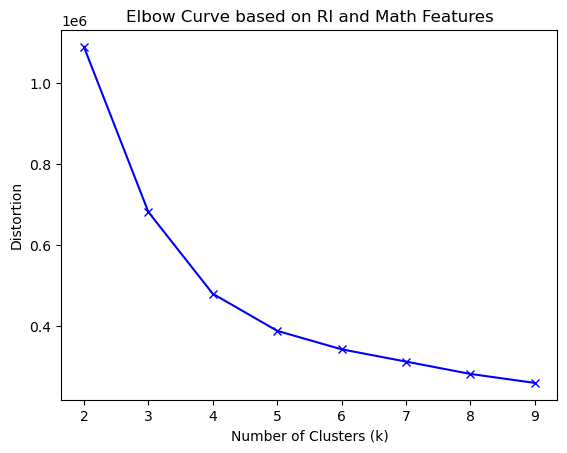

In [113]:

# Define the range of k values to evaluate
k_values = range(2, 10)

distortions = []
results = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=50)
    kmeans.fit(X_train)
    results.append(kmeans.labels_)
    distortion = kmeans.inertia_
    distortions.append(distortion)

plt.plot(k_values, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Curve based on RI and Math Features')
plt.show()


In [114]:
### Adjusted RandIndex
from sklearn.metrics import adjusted_rand_score
import numpy as np

# Set the number of clusters for k-means
n_clusters = 3

cluster_labels = []
all_labels = []
num_runs = 10
for _ in range(num_runs):
    perturbed_data = X_train + np.random.normal(scale=0.01, size=X_train.shape)  # Perturb the data
    labels = kmeans.fit_predict(perturbed_data)
    cluster_labels.append(labels)

# Calculate similarity scores (ARI) between clusters
ari_scores = []
for i in range(len(cluster_labels)):
    for j in range(i+1, len(cluster_labels)):
        ari = adjusted_rand_score(cluster_labels[i], cluster_labels[j])
        ari_scores.append(ari)

# Assess cluster stability using the similarity scores
average_ari = np.mean(ari_scores)
print("Average ARI:", average_ari)


Average ARI: 0.9705432572135104


## Experiment 3: RI English

In [115]:
### Only on RI ANN
RI_data=pd.concat([RI,RI_Math_data['Level ']],axis=1)
X_train,X_test,y_train,y_test=train_test_split(RI_data.iloc[:,:-1],RI_data.iloc[:,-1],test_size=0.2,random_state=42)
y1_train=y_train.replace({2:1,3:2,4:3,5:3})
y1_test=y_test.replace({2:1,3:2,4:3,5:3})

In [116]:
RI_data.columns

Index(['GF', 'FK', 'SMOG', 'AR', 'CL', 'Level '], dtype='object')

In [117]:

### ANN on 5 levels
y5_train=to_categorical(y_train)
y5_test=to_categorical(y_test)

y5_train=y5_train[:,1:]
y5_test=y5_test[:,1:]

model=Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(32, input_dim=5, activation='relu'))

# Add the output layer
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

model.fit(X_train, y5_train, epochs=32, batch_size=16)
pred_train=np.argmax(model.predict(X_train),axis=1)+1
pred_test=np.argmax(model.predict(X_test),axis=1)+1

print(classification_report(y_test,pred_test))
print("\n")
print(classification_report(y_train,pred_train))

Epoch 1/32
88/88 [==============================] - 1s 2ms/step - loss: 15.6171 - accuracy: 0.2072
Epoch 2/32
88/88 [==============================] - 0s 2ms/step - loss: 3.7715 - accuracy: 0.2093
Epoch 3/32
88/88 [==============================] - 0s 2ms/step - loss: 2.1957 - accuracy: 0.2409
Epoch 4/32
88/88 [==============================] - 0s 2ms/step - loss: 1.8312 - accuracy: 0.2703
Epoch 5/32
88/88 [==============================] - 0s 2ms/step - loss: 1.7377 - accuracy: 0.2746
Epoch 6/32
88/88 [==============================] - 0s 2ms/step - loss: 1.7153 - accuracy: 0.2523
Epoch 7/32
88/88 [==============================] - 0s 2ms/step - loss: 1.6728 - accuracy: 0.2609
Epoch 8/32
88/88 [==============================] - 0s 2ms/step - loss: 1.6362 - accuracy: 0.2688
Epoch 9/32
88/88 [==============================] - 0s 2ms/step - loss: 1.6169 - accuracy: 0.2638
Epoch 10/32
88/88 [==============================] - 0s 2ms/step - loss: 1.6357 - accuracy: 0.2559
Epoch 11/32
88/88 

In [118]:
#### ANN 3 classes

y11_train=to_categorical(y1_train)
y11_test=to_categorical(y1_test)

y11_train=y11_train[:,1:]
y11_test=y11_test[:,1:]

model=Sequential()
# Add the input layer and the first hidden layer
model.add(Dense(32, input_dim=5, activation='relu'))

# Add the output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

model.fit(X_train, y11_train, epochs=32, batch_size=16)


pred_train=np.argmax(model.predict(X_train),axis=1)+1
pred_test=np.argmax(model.predict(X_test),axis=1)+1

print(classification_report(y1_test,pred_test))
print("\n")
print(classification_report(y1_train,pred_train))

Epoch 1/32
88/88 [==============================] - 1s 2ms/step - loss: 3.4808 - accuracy: 0.4079
Epoch 2/32
88/88 [==============================] - 0s 2ms/step - loss: 1.5819 - accuracy: 0.4401
Epoch 3/32
88/88 [==============================] - 0s 2ms/step - loss: 1.3494 - accuracy: 0.4351
Epoch 4/32
88/88 [==============================] - 0s 2ms/step - loss: 1.2293 - accuracy: 0.4717
Epoch 5/32
88/88 [==============================] - 0s 2ms/step - loss: 1.1515 - accuracy: 0.4659
Epoch 6/32
88/88 [==============================] - 0s 2ms/step - loss: 1.1609 - accuracy: 0.4581
Epoch 7/32
88/88 [==============================] - 0s 2ms/step - loss: 1.1029 - accuracy: 0.4767
Epoch 8/32
88/88 [==============================] - 0s 2ms/step - loss: 1.0831 - accuracy: 0.4889
Epoch 9/32
88/88 [==============================] - 0s 2ms/step - loss: 1.0580 - accuracy: 0.4918
Epoch 10/32
88/88 [==============================] - 0s 2ms/step - loss: 1.0792 - accuracy: 0.4789
Epoch 11/32
88/88 [

In [119]:
## Decision Trees

### Test on 5 levels
mod_dt=DecisionTreeClassifier(class_weight='balanced',max_depth=5)
mod_dt.fit(X_train,y_train)

## Predictions
tr_pred=mod_dt.predict(X_train)
te_pred=mod_dt.predict(X_test)

print(classification_report(y_train,tr_pred))
print("\n")
print(classification_report(y_test,te_pred))



              precision    recall  f1-score   support

           1       0.40      0.47      0.43       137
           2       0.37      0.19      0.25       275
           3       0.30      0.19      0.23       314
           4       0.40      0.21      0.28       320
           5       0.37      0.76      0.50       349

    accuracy                           0.36      1395
   macro avg       0.37      0.36      0.34      1395
weighted avg       0.36      0.36      0.33      1395



              precision    recall  f1-score   support

           1       0.24      0.24      0.24        41
           2       0.36      0.25      0.29        65
           3       0.38      0.23      0.29        78
           4       0.18      0.09      0.12        78
           5       0.33      0.68      0.45        87

    accuracy                           0.32       349
   macro avg       0.30      0.30      0.28       349
weighted avg       0.30      0.32      0.29       349



In [120]:
### Decision Tree on 3 levels
mod_dt=DecisionTreeClassifier(class_weight='balanced',max_depth=5)
mod_dt.fit(X_train,y1_train)

tr_pred=mod_dt.predict(X_train)
te_pred=mod_dt.predict(X_test)

print(classification_report(y1_train,tr_pred))
print("\n")
print(classification_report(y1_test,te_pred))


              precision    recall  f1-score   support

           1       0.38      0.70      0.50       412
           2       0.46      0.23      0.31       314
           3       0.66      0.48      0.56       669

    accuracy                           0.49      1395
   macro avg       0.50      0.47      0.45      1395
weighted avg       0.53      0.49      0.48      1395



              precision    recall  f1-score   support

           1       0.35      0.63      0.45       106
           2       0.27      0.13      0.17        78
           3       0.57      0.42      0.49       165

    accuracy                           0.42       349
   macro avg       0.40      0.39      0.37       349
weighted avg       0.44      0.42      0.41       349



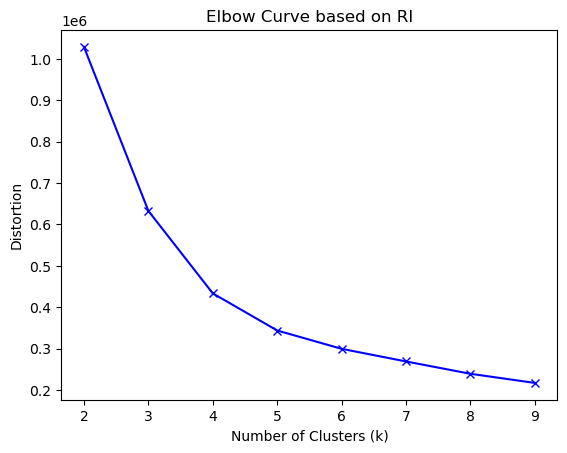

In [121]:
# Define the range of k values to evaluate
k_values = range(2, 10)

distortions = []
results = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=50)
    kmeans.fit(X_train)
    results.append(kmeans.labels_)
    distortion = kmeans.inertia_
    distortions.append(distortion)

plt.plot(k_values, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Curve based on RI')
plt.show()


In [122]:
### Adjusted RandIndex
from sklearn.metrics import adjusted_rand_score
import numpy as np

# Set the number of clusters for k-means
n_clusters = 3

cluster_labels = []
all_labels = []
num_runs = 10
for _ in range(num_runs):
    perturbed_data = X_train + np.random.normal(scale=0.01, size=X_train.shape)  # Perturb the data
    labels = kmeans.fit_predict(perturbed_data)
    cluster_labels.append(labels)

# Calculate similarity scores (ARI) between clusters
ari_scores = []
for i in range(len(cluster_labels)):
    for j in range(i+1, len(cluster_labels)):
        ari = adjusted_rand_score(cluster_labels[i], cluster_labels[j])
        ari_scores.append(ari)

# Assess cluster stability using the similarity scores
average_ari = np.mean(ari_scores)
print("Average ARI:", average_ari)


Average ARI: 0.9967908978399902


In [123]:
### Ordered regression  5 classes
#### Ordered Regression 5 classes
ord_data=pd.concat([X_train,y_train],axis=1)
mod_ordered=OrderedModel(ord_data['Level '],ord_data[['GF', 'FK', 'SMOG', 'AR', 'CL']],distr='logit')

res_log = mod_ordered.fit(method='bfgs')
res_log.summary()


ord_test=pd.concat([X_test,y_test],axis=1)
pred_train=res_log.model.predict(res_log.params, exog=ord_data[['GF', 'FK', 'SMOG', 'AR', 'CL']])
pred_test=res_log.model.predict(res_log.params, exog=ord_test[['GF', 'FK', 'SMOG', 'AR', 'CL']])


Optimization terminated successfully.
         Current function value: 1.538171
         Iterations: 25
         Function evaluations: 28
         Gradient evaluations: 28


In [124]:
pred_train1=np.argmax(pred_train, axis=1)+1
pred_test1=np.argmax(pred_test, axis=1)+1
print(classification_report(ord_data['Level '],pred_train1))
print("\n")
print(classification_report(ord_test['Level '],pred_test1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       137
           2       0.29      0.32      0.30       275
           3       0.27      0.26      0.27       314
           4       0.18      0.02      0.04       320
           5       0.31      0.67      0.43       349

    accuracy                           0.29      1395
   macro avg       0.21      0.25      0.21      1395
weighted avg       0.24      0.29      0.24      1395



              precision    recall  f1-score   support

           1       0.00      0.00      0.00        41
           2       0.20      0.23      0.21        65
           3       0.24      0.23      0.24        78
           4       0.22      0.03      0.05        78
           5       0.28      0.61      0.38        87

    accuracy                           0.25       349
   macro avg       0.19      0.22      0.18       349
weighted avg       0.21      0.25      0.20       349



In [125]:
X_train.columns

Index(['GF', 'FK', 'SMOG', 'AR', 'CL'], dtype='object')

In [126]:
#### Ordered Regression 3 levels
from statsmodels.miscmodels.ordinal_model import OrderedModel
ord_data1=pd.concat([X_train,y1_train],axis=1)
mod_ordered1=OrderedModel(ord_data1['Level '],ord_data1[['GF', 'FK', 'SMOG', 'AR', 'CL']],distr='logit')

res_log1 = mod_ordered1.fit(method='bfgs')
res_log1.summary()


ord_test1=pd.concat([X_test,y1_test],axis=1)
pred_train=res_log1.model.predict(res_log1.params, exog=ord_data1[['GF', 'FK', 'SMOG', 'AR', 'CL']])
pred_test=res_log1.model.predict(res_log1.params, exog=ord_test1[['GF', 'FK', 'SMOG', 'AR', 'CL']])


Optimization terminated successfully.
         Current function value: 1.026114
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24


In [127]:
pred_train=np.argmax(pred_train,axis=1)+1
pred_test=np.argmax(pred_test,axis=1)+1

print(classification_report(ord_data1['Level '],pred_train))

              precision    recall  f1-score   support

           1       0.45      0.29      0.36       412
           2       0.00      0.00      0.00       314
           3       0.51      0.87      0.65       669

    accuracy                           0.50      1395
   macro avg       0.32      0.39      0.33      1395
weighted avg       0.38      0.50      0.41      1395



In [128]:
print(classification_report(ord_test1['Level '],pred_test))

              precision    recall  f1-score   support

           1       0.51      0.32      0.39       106
           2       0.00      0.00      0.00        78
           3       0.52      0.88      0.65       165

    accuracy                           0.52       349
   macro avg       0.34      0.40      0.35       349
weighted avg       0.40      0.52      0.43       349



In [129]:
####3 MAth Equation
RI_Math_data['computed']=RI_Math_data['Mword_count']*0.2824 + RI_Math_data['mathprop']*(-0.0773) + RI_Math_data['MathSymbolsPerSentence']*(.1345)+ RI_Math_data['NumCountPerSentence']*(-0.0262)

In [130]:
cols=['GF','FK','SMOG','AR','CL','computed','Level ']
new_data=RI_Math_data[cols]

In [131]:
X_train,X_test,y_train,y_test=train_test_split(new_data.iloc[:,:-1],new_data.iloc[:,-1],test_size=0.2,random_state=42)
y1_train=y_train.replace({2:1,3:2,4:3,5:3})
y1_test=y_test.replace({2:1,3:2,4:3,5:3})

In [132]:
### Decision Tree on 5 levels
mod_dt=DecisionTreeClassifier(class_weight='balanced',max_depth=5)
mod_dt.fit(X_train,y_train)

tr_pred=mod_dt.predict(X_train)
te_pred=mod_dt.predict(X_test)

print(classification_report(y_train,tr_pred))
print("\n")
print(classification_report(y_test,te_pred))


              precision    recall  f1-score   support

           1       0.38      0.55      0.45       137
           2       0.31      0.40      0.35       275
           3       0.35      0.30      0.32       314
           4       0.47      0.12      0.19       320
           5       0.44      0.61      0.51       349

    accuracy                           0.38      1395
   macro avg       0.39      0.40      0.36      1395
weighted avg       0.39      0.38      0.36      1395



              precision    recall  f1-score   support

           1       0.23      0.27      0.25        41
           2       0.26      0.38      0.31        65
           3       0.36      0.29      0.32        78
           4       0.19      0.08      0.11        78
           5       0.41      0.52      0.45        87

    accuracy                           0.32       349
   macro avg       0.29      0.31      0.29       349
weighted avg       0.30      0.32      0.30       349



In [133]:
### Decision Tree on 3 levels
mod_dt=DecisionTreeClassifier(class_weight='balanced',max_depth=5)
mod_dt.fit(X_train,y1_train)

tr_pred=mod_dt.predict(X_train)
te_pred=mod_dt.predict(X_test)

print(classification_report(y1_train,tr_pred))
print("\n")
print(classification_report(y1_test,te_pred))


              precision    recall  f1-score   support

           1       0.47      0.69      0.56       412
           2       0.41      0.34      0.37       314
           3       0.67      0.54      0.60       669

    accuracy                           0.54      1395
   macro avg       0.52      0.52      0.51      1395
weighted avg       0.55      0.54      0.54      1395



              precision    recall  f1-score   support

           1       0.45      0.61      0.52       106
           2       0.33      0.27      0.30        78
           3       0.69      0.58      0.63       165

    accuracy                           0.52       349
   macro avg       0.49      0.49      0.48       349
weighted avg       0.54      0.52      0.52       349



In [134]:
### ANN on 5 levels
y5_train=to_categorical(y_train)
y5_test=to_categorical(y_test)

y5_train=y5_train[:,1:]
y5_test=y5_test[:,1:]

model=Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(32, input_dim=6, activation='relu'))

# Add the output layer
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

model.fit(X_train, y5_train, epochs=32, batch_size=16)
pred_train=np.argmax(model.predict(X_train),axis=1)+1
pred_test=np.argmax(model.predict(X_test),axis=1)+1

print(classification_report(y_test,pred_test))
print("\n")
print(classification_report(y_train,pred_train))

Epoch 1/32
88/88 [==============================] - 1s 2ms/step - loss: 12.8831 - accuracy: 0.2022
Epoch 2/32
88/88 [==============================] - 0s 2ms/step - loss: 2.3269 - accuracy: 0.2409
Epoch 3/32
88/88 [==============================] - 0s 2ms/step - loss: 1.9448 - accuracy: 0.2530
Epoch 4/32
88/88 [==============================] - 0s 2ms/step - loss: 1.8296 - accuracy: 0.2516
Epoch 5/32
88/88 [==============================] - 0s 2ms/step - loss: 1.7685 - accuracy: 0.2559
Epoch 6/32
88/88 [==============================] - 0s 2ms/step - loss: 1.7281 - accuracy: 0.2595
Epoch 7/32
88/88 [==============================] - 0s 2ms/step - loss: 1.6957 - accuracy: 0.2724
Epoch 8/32
88/88 [==============================] - 0s 2ms/step - loss: 1.6928 - accuracy: 0.2631
Epoch 9/32
88/88 [==============================] - 0s 2ms/step - loss: 1.6534 - accuracy: 0.2631
Epoch 10/32
88/88 [==============================] - 0s 2ms/step - loss: 1.6358 - accuracy: 0.2573
Epoch 11/32
88/88 

In [135]:
#### ANN 3 classes

y11_train=to_categorical(y1_train)
y11_test=to_categorical(y1_test)

y11_train=y11_train[:,1:]
y11_test=y11_test[:,1:]

model=Sequential()
# Add the input layer and the first hidden layer
model.add(Dense(32, input_dim=6, activation='relu'))

# Add the output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

model.fit(X_train, y11_train, epochs=32, batch_size=16)


pred_train=np.argmax(model.predict(X_train),axis=1)+1
pred_test=np.argmax(model.predict(X_test),axis=1)+1

print(classification_report(y1_test,pred_test))
print("\n")
print(classification_report(y1_train,pred_train))

Epoch 1/32
88/88 [==============================] - 1s 1ms/step - loss: 6.5121 - accuracy: 0.3799
Epoch 2/32
88/88 [==============================] - 0s 2ms/step - loss: 1.2647 - accuracy: 0.4667
Epoch 3/32
88/88 [==============================] - 0s 1ms/step - loss: 1.1681 - accuracy: 0.4738
Epoch 4/32
88/88 [==============================] - 0s 2ms/step - loss: 1.1613 - accuracy: 0.4810
Epoch 5/32
88/88 [==============================] - 0s 2ms/step - loss: 1.1038 - accuracy: 0.4781
Epoch 6/32
88/88 [==============================] - 0s 2ms/step - loss: 1.0812 - accuracy: 0.4853
Epoch 7/32
88/88 [==============================] - 0s 2ms/step - loss: 1.0610 - accuracy: 0.4860
Epoch 8/32
88/88 [==============================] - 0s 2ms/step - loss: 1.0976 - accuracy: 0.4509
Epoch 9/32
88/88 [==============================] - 0s 2ms/step - loss: 1.0423 - accuracy: 0.5068
Epoch 10/32
88/88 [==============================] - 0s 2ms/step - loss: 1.0489 - accuracy: 0.5039
Epoch 11/32
88/88 [

In [140]:
######## Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

classifier=

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate the accuracy scores
scores = cross_val_score(classifier, X_train, y_train, cv=kfold)
scores.mean()

0.27168458781362004

array([0.29032258, 0.2437276 , 0.25806452, 0.31182796, 0.25089606])

In [136]:
y2_train= to_categorical(y_train)
y2_train=y2_train[:,1:]
y2_test=to_categorical(y_test)
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(32, input_dim=5, activation='relu'))

# Add the output layer
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y2_train, epochs=32, batch_size=16)

# Once the model is trained, you can use it for predictions
# Assuming X_test is your test data
# y_pred = model.predict(X_test)






Epoch 1/32


ValueError: in user code:

    File "C:\Users\Pawan\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Pawan\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Pawan\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Pawan\anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Pawan\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Pawan\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 6)


In [ ]:
y2_test=y2_test[:,1:]

In [ ]:


### Predictions
pred_train=np.argmax(model.predict(X_train),axis=1)+1
pred_train

In [ ]:
pred_test=np.argmax(model.predict(X_test),axis=1)+1
print(classification_report(y_test,pred_test))

In [ ]:
print(classification_report(y_train,pred_train))

In [ ]:
####### on 3 levels
y11_train=to_categorical(y1_train)
y11_test=to_categorical(y1_test)

y11_train=y11_train[:,1:]
y11_test=y11_test[:,1:]

# Add the input layer and the first hidden layer
model.add(Dense(32, input_dim=5, activation='relu'))

# Add the output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

model.fit(X_train, y11_train, epochs=32, batch_size=16)

In [ ]:
pred_train=np.argmax(model.predict(X_train),axis=1)+1
pred_test=np.argmax(model.predict(X_test),axis=1)+1

In [ ]:
print(classification_report(y1_train,pred_train))
print("\n")
print(classification_report(y1_test,pred_test))